In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df_2000 = pd.read_csv('Data/final_tmdb_data_2000.csv.gz')
df_2000.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1208 entries, 0 to 1207
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_id                1208 non-null   object 
 1   adult                  1207 non-null   float64
 2   backdrop_path          643 non-null    object 
 3   belongs_to_collection  111 non-null    object 
 4   budget                 1207 non-null   float64
 5   genres                 1207 non-null   object 
 6   homepage               68 non-null     object 
 7   id                     1207 non-null   float64
 8   original_language      1207 non-null   object 
 9   original_title         1207 non-null   object 
 10  overview               1185 non-null   object 
 11  popularity             1207 non-null   float64
 12  poster_path            1069 non-null   object 
 13  production_companies   1207 non-null   object 
 14  production_countries   1207 non-null   object 
 15  rele

In [9]:
df_2001 = pd.read_csv('Data/final_tmdb_data_2001.csv.gz')
df_2001.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1290 entries, 0 to 1289
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_id                1290 non-null   object 
 1   adult                  1289 non-null   float64
 2   backdrop_path          663 non-null    object 
 3   belongs_to_collection  86 non-null     object 
 4   budget                 1289 non-null   float64
 5   genres                 1289 non-null   object 
 6   homepage               108 non-null    object 
 7   id                     1289 non-null   float64
 8   original_language      1289 non-null   object 
 9   original_title         1289 non-null   object 
 10  overview               1261 non-null   object 
 11  popularity             1289 non-null   float64
 12  poster_path            1136 non-null   object 
 13  production_companies   1289 non-null   object 
 14  production_countries   1289 non-null   object 
 15  rele

In [7]:
combined_df = pd.concat([df_2000, df_2001], axis=0)

combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2498 entries, 0 to 1289
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_id                2498 non-null   object 
 1   adult                  2496 non-null   float64
 2   backdrop_path          1306 non-null   object 
 3   belongs_to_collection  197 non-null    object 
 4   budget                 2496 non-null   float64
 5   genres                 2496 non-null   object 
 6   homepage               176 non-null    object 
 7   id                     2496 non-null   float64
 8   original_language      2496 non-null   object 
 9   original_title         2496 non-null   object 
 10  overview               2446 non-null   object 
 11  popularity             2496 non-null   float64
 12  poster_path            2205 non-null   object 
 13  production_companies   2496 non-null   object 
 14  production_countries   2496 non-null   object 
 15  rele

In [32]:
#Now that we have these two CSV files combined, let's export a combined file to our Data folder

combined_df.to_csv('Data/tmdb_results_combined.csv.gz', compression="gzip", index=False)

In [12]:
#Quick check to see how many of our movies have at least SOME valid financial information

financial_df = combined_df.loc[(combined_df['budget']>0) | (combined_df['revenue']>0)]

count = financial_df['imdb_id'].count()

print(f'There are {count} movies with at least SOME financial information')

There are 623 movies with at least SOME financial information


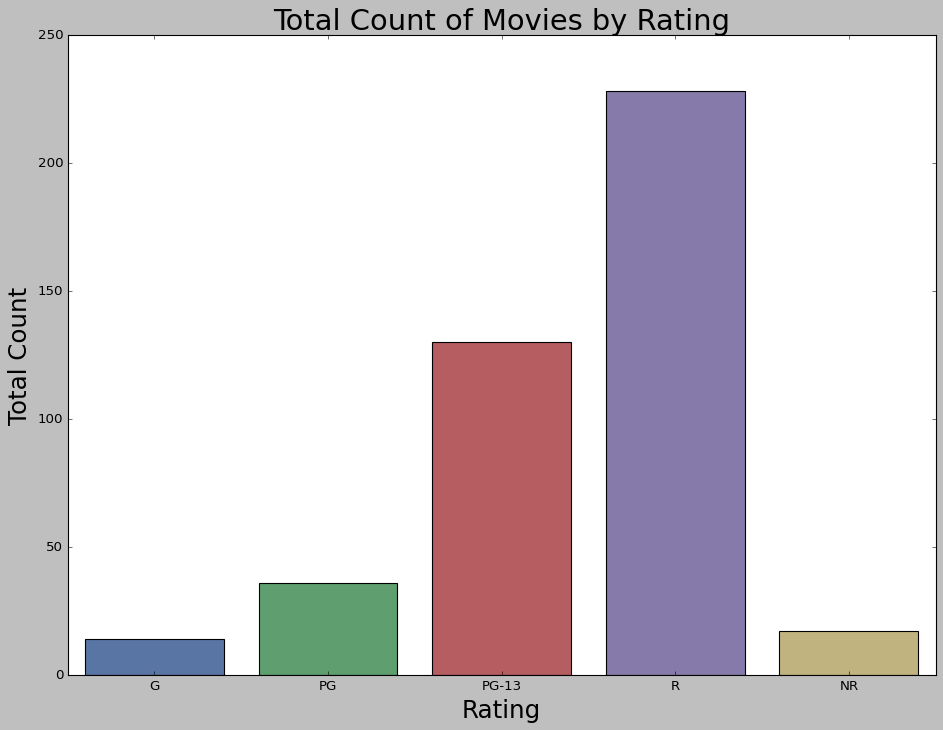

In [27]:
#First, let's explore total count of movies in each certification category

rating_order = ['G', 'PG', 'PG-13', 'R', 'NR']
plt.figure(figsize = (14,10))
plt.style.use('seaborn-deep')
sns.countplot(data = financial_df, x='certification', order=rating_order)
plt.title('Total Count of Movies by Rating', fontsize=26)
plt.xlabel('Rating', fontsize=22)
plt.ylabel('Total Count', fontsize=22)
plt.show()

C:\Users\jfabe\AppData\Local\Temp\ipykernel_4680\2143792163.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_yticklabels(ylabels)


Text(0, 0.5, 'Average Revenue')

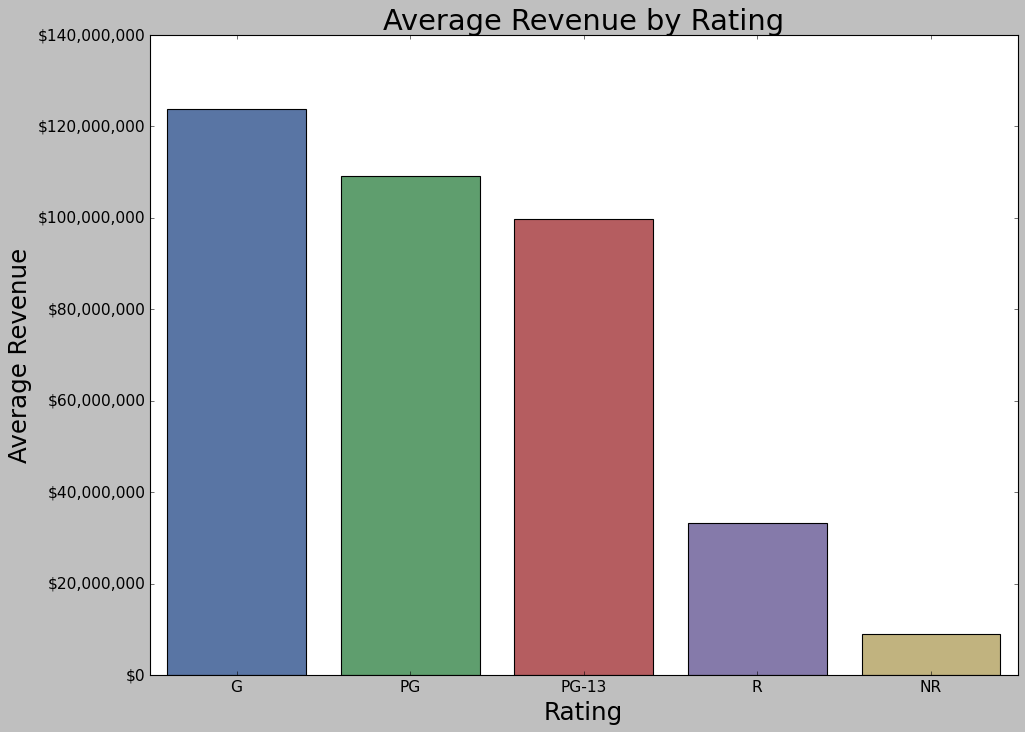

In [28]:
#Now let's take a look at average revenue per certification category

revenue_grouped = visual_df.groupby('certification').mean()['revenue']
revenue_grouped = revenue_grouped.reset_index()

plt.figure(figsize = (14,10))
plt.style.use('seaborn-deep')
g = sns.barplot(data = revenue_grouped, x=revenue_grouped['certification'], 
                y=revenue_grouped['revenue'], order = rating_order)
ylabels = ['${:,.0f}'.format(y) for y in g.get_yticks()]
g.set_yticklabels(ylabels)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Average Revenue by Rating', fontsize=26)
plt.xlabel('Rating', fontsize=22)
plt.ylabel('Average Revenue',fontsize=22)

C:\Users\jfabe\AppData\Local\Temp\ipykernel_4680\893507680.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  g2.set_yticklabels(ylabels2)


Text(0, 0.5, 'Average Budget')

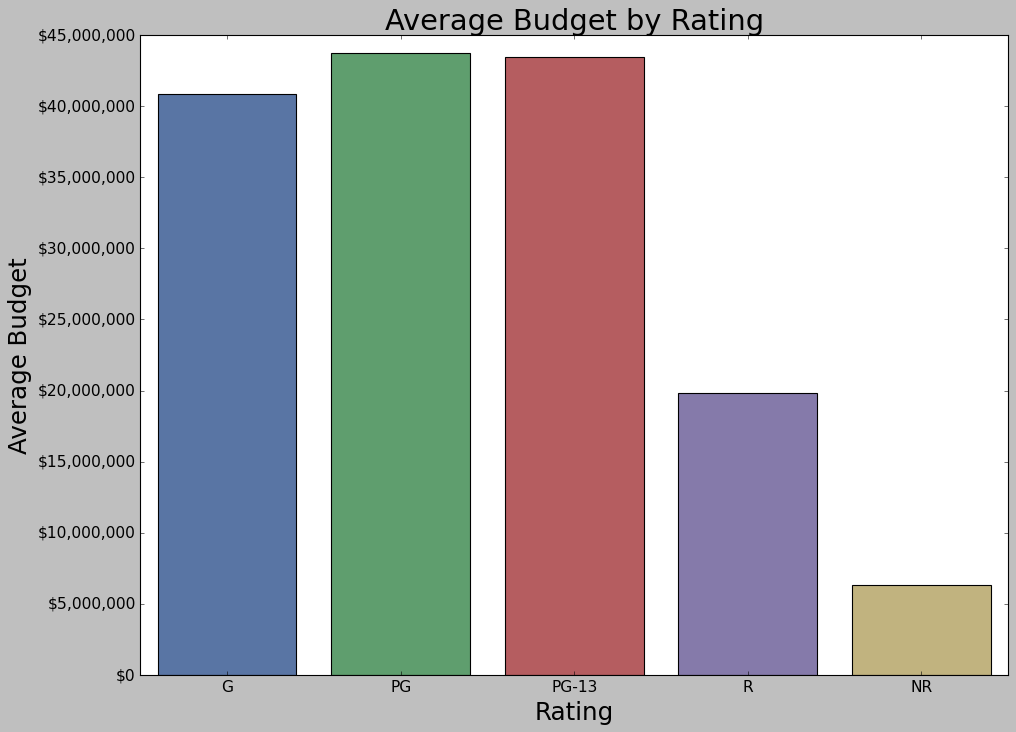

In [31]:
#For our final visualization, we will look at average BUDGET per certification category

budget_grouped = visual_df.groupby('certification').mean()['budget']
budget_grouped = budget_grouped.reset_index()

plt.figure(figsize = (14,10))
plt.style.use('seaborn-deep')
g2 = sns.barplot(data = budget_grouped, x=budget_grouped['certification'], 
                y=budget_grouped['budget'], order = rating_order)
ylabels2 = ['${:,.0f}'.format(y) for y in g2.get_yticks()]
g2.set_yticklabels(ylabels2)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Average Budget by Rating', fontsize=26)
plt.xlabel('Rating', fontsize=22)
plt.ylabel('Average Budget',fontsize=22)